# Catboost
## 1.1 通用数据准备

In [18]:
import pandas as pd
import numpy as np
import pickle
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import log_loss, roc_auc_score, auc, roc_curve
from sklearn.model_selection import train_test_split

In [19]:
dataset = pd.read_csv("Basic_feature.csv", index_col=0)
dataset

,User_id,Merchant_id,Coupon_id,c1,c2,c3,c4,c5,c6,c7,...,um3,um4,um5,um6,um7,um8,um9,um10,um11,um12
0,1439408,4663,11002.0,1.0,7730,15.0,0.001940,NaN,5,NaN,...,NaN,NaN,0.25,NaN,NaN,1,2,1.0,0.500000,NaN
1,1439408,2632,8591.0,1.0,31,4.0,0.129032,NaN,2,NaN,...,1.0,0.25,0.75,3.0,2.0,4,2,1.0,0.500000,NaN
2,1439408,2632,1078.0,1.0,12,NaN,NaN,NaN,5,NaN,...,1.0,0.25,0.75,3.0,2.0,4,2,1.0,0.500000,NaN
3,1439408,2632,8591.0,1.0,31,4.0,0.129032,NaN,0,NaN,...,1.0,0.25,0.75,3.0,2.0,4,2,1.0,0.500000,NaN
4,1439408,2632,8591.0,1.0,31,4.0,0.129032,28.0,0,0.0,...,1.0,0.25,0.75,3.0,2.0,4,2,1.0,0.500000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053277,212662,3021,3739.0,1.0,11,2.0,0.181818,4.0,2,6.0,...,2.0,1.00,NaN,2.0,NaN,2,3,2.0,0.666667,0.666667
1053278,212662,2934,5686.0,1.0,10533,1611.0,0.152948,1.0,0,1.0,...,2.0,1.00,NaN,5.0,3.0,2,3,2.0,0.666667,0.333333
1053279,212662,3021,3739.0,1.0,11,2.0,0.181818,25.0,6,3.0,...,2.0,1.00,NaN,2.0,NaN,2,3,2.0,0.666667,0.666667
1053280,752472,7113,1633.0,1.0,929,12.0,0.012917,NaN,0,NaN,...,NaN,NaN,0.50,NaN,NaN,1,2,NaN,NaN,NaN


## 1.2 有目的地填补缺失值

In [20]:
temp1 = ['u3','u4','u5','u10','u11','u12','u13','um11','um12','c11','c12','m4','m5','m6','m7','m8','m9',]
    
for i in temp1:
    dataset[i]=dataset[i].fillna(-1)

dataset = dataset.replace({np.nan:0})
dataset

,User_id,Merchant_id,Coupon_id,c1,c2,c3,c4,c5,c6,c7,...,um3,um4,um5,um6,um7,um8,um9,um10,um11,um12
0,1439408,4663,11002.0,1.0,7730,15.0,0.001940,0.0,5,0.0,...,0.0,0.00,0.25,0.0,0.0,1,2,1.0,0.500000,-1.000000
1,1439408,2632,8591.0,1.0,31,4.0,0.129032,0.0,2,0.0,...,1.0,0.25,0.75,3.0,2.0,4,2,1.0,0.500000,-1.000000
2,1439408,2632,1078.0,1.0,12,0.0,0.000000,0.0,5,0.0,...,1.0,0.25,0.75,3.0,2.0,4,2,1.0,0.500000,-1.000000
3,1439408,2632,8591.0,1.0,31,4.0,0.129032,0.0,0,0.0,...,1.0,0.25,0.75,3.0,2.0,4,2,1.0,0.500000,-1.000000
4,1439408,2632,8591.0,1.0,31,4.0,0.129032,28.0,0,0.0,...,1.0,0.25,0.75,3.0,2.0,4,2,1.0,0.500000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053277,212662,3021,3739.0,1.0,11,2.0,0.181818,4.0,2,6.0,...,2.0,1.00,0.00,2.0,0.0,2,3,2.0,0.666667,0.666667
1053278,212662,2934,5686.0,1.0,10533,1611.0,0.152948,1.0,0,1.0,...,2.0,1.00,0.00,5.0,3.0,2,3,2.0,0.666667,0.333333
1053279,212662,3021,3739.0,1.0,11,2.0,0.181818,25.0,6,3.0,...,2.0,1.00,0.00,2.0,0.0,2,3,2.0,0.666667,0.666667
1053280,752472,7113,1633.0,1.0,929,12.0,0.012917,0.0,0,0.0,...,0.0,0.00,0.50,0.0,0.0,1,2,0.0,-1.000000,-1.000000


## 1.3 替换分类变量，防止意外出错；初步分类X和Y

In [21]:
dataset.drop_duplicates(inplace=True)
dataset.replace({"Label":{-1:2}},inplace = True) #-1类换为2
dataset_y = dataset[['Label']]
dataset_x = dataset.drop(['User_id','Merchant_id', 'Coupon_id','Label'],axis=1)

## 1.4 PCA后分训练集和测试集

In [22]:
from sklearn import datasets
from sklearn.decomposition import PCA


features = ['c1','c2','c3','c4','c6','c8','c9','c10','c11','c12','m1','m2','m3','m4','m5','m6','m7','m8','m9','u1','u2','u3','u4','u5','u6','u7','u8','u9','u10','u11','u12','u13','um0','um1','um2','um3','um4','um5','um6','um7','um8','um9','um10','um11','um12']
X = dataset_x[features]

pca = PCA(n_components=20) # we select PCA algorithm with 2 dimensions
pca = pca.fit(X) # same as 1.3
z = pca.transform(X)

PCA_Features = pd.DataFrame(z)
PCA_Features.columns=(['pca_z1','pca_z2','pca_z3','pca_z4','pca_z5','pca_z6','pca_z7','pca_z8','pca_z9','pca_z10','pca_z11','pca_z12','pca_z13','pca_z14','pca_z15','pca_z16','pca_z17','pca_z18','pca_z19','pca_z20'])
PCA_Features

,pca_z1,pca_z2,pca_z3,pca_z4,pca_z5,pca_z6,pca_z7,pca_z8,pca_z9,pca_z10,pca_z11,pca_z12,pca_z13,pca_z14,pca_z15,pca_z16,pca_z17,pca_z18,pca_z19,pca_z20
0,-3067.005037,-37.646933,-222.928506,27.046421,68.969567,-2.355173,28.578497,-48.154227,11.433830,8.193252,-7.433096,-0.065581,-2.095422,2.502660,0.951489,-1.679014,-0.169991,-0.163916,-0.119766,-0.189440
1,-10765.824676,-41.287565,-129.452437,8.795272,-35.656876,0.743502,28.294006,-45.286650,16.008979,7.964863,-6.438200,-0.494883,-1.363148,2.457730,3.052328,1.095862,-1.421240,0.359195,0.988592,-0.836918
2,-10784.874895,-41.275126,-133.204592,8.792027,-35.752156,0.743201,28.124988,-45.474252,15.583329,8.105025,-6.517857,-0.387485,-1.387156,2.182244,3.300765,-1.908237,-1.692604,0.675740,-0.882750,0.036228
3,-10765.824668,-41.287556,-129.452958,8.795211,-35.664223,0.745680,28.303391,-45.282969,16.024091,7.982576,-6.424124,-0.527630,-1.320737,2.405484,3.125784,3.068239,-1.116946,0.288922,0.985571,-0.833910
4,-10765.824668,-41.287556,-129.452958,8.795211,-35.664223,0.745680,28.303391,-45.282969,16.024091,7.982576,-6.424124,-0.527630,-1.320737,2.405484,3.125784,3.068239,-1.116946,0.288922,0.985571,-0.833910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008451,-10785.826070,-32.470343,-131.624337,5.682370,-25.566946,-0.817853,15.761541,-11.462102,-3.987241,-1.837628,12.908386,-4.019984,-3.377538,2.714977,-3.046807,1.195705,0.423500,0.676048,-0.068268,-1.015623
1008452,-243.857577,-45.757000,1340.480205,8.676899,8.132656,-0.727219,13.751863,-9.346888,-2.702880,0.056108,13.579428,-3.088925,-3.783647,1.120374,-3.008574,3.482696,1.229593,-0.320317,-0.430877,-0.692148
1008453,-10785.826087,-32.470360,-131.623295,5.682491,-25.552251,-0.822209,15.742773,-11.469462,-4.017465,-1.873054,12.880234,-3.954490,-3.462361,2.819469,-3.193719,-2.749049,-0.185090,0.816594,-0.062225,-1.021639
1008454,-9867.715242,-43.083737,-134.441305,24.067453,-7.989902,-3.087055,-6.702413,0.706237,-0.939766,-0.312135,-0.376999,0.882318,-1.799926,0.687968,-0.206364,3.182544,1.041446,-0.164233,0.006459,0.010463


In [23]:
print(PCA_Features.shape,dataset_y.shape)

(1008456, 20) (1008456, 1)


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(
    PCA_Features,
    #dataset_x, 
    dataset_y, test_size=0.3, random_state=42)

## 1.5 不平衡数据处理

In [25]:
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler

sampler = RandomOverSampler(shrinkage=1, random_state=0)
X_train_ROS, Y_train_ROS = sampler.fit_resample(X_train, Y_train)

In [26]:
#选取数据集
#SMOTE和ADASYN太慢了，用ROS代替训练先
X_train = X_train_ROS
Y_train = Y_train_ROS

In [27]:
X_train

,pca_z1,pca_z2,pca_z3,pca_z4,pca_z5,pca_z6,pca_z7,pca_z8,pca_z9,pca_z10,pca_z11,pca_z12,pca_z13,pca_z14,pca_z15,pca_z16,pca_z17,pca_z18,pca_z19,pca_z20
0,-514.608478,-42.555854,283.770850,25.393911,-36.193821,-1.874125,-6.818957,0.995470,-0.668172,-0.240235,-0.258265,0.720683,-1.638210,1.205813,0.297035,1.024043,1.500867,-0.218635,-0.005131,0.065317
1,-10474.799521,-34.305681,-131.715929,13.824305,-26.159319,-0.175842,-7.108138,0.737885,-0.897352,-0.259660,-0.382087,0.970492,-2.006794,1.310340,-0.041318,-0.953665,1.248839,-0.001758,0.058554,0.021694
2,-10508.037036,-9.774607,-69.762228,-26.552919,-33.466265,4.685864,-6.576088,1.709546,0.668689,-0.235953,0.038642,-0.853727,0.963477,0.354212,0.725648,-1.842679,-0.443493,1.370167,0.723313,-0.253998
3,702.843342,56.630319,-220.702201,-23.632171,-61.553628,-15.198861,-4.668401,0.821069,-0.229329,0.137466,0.000074,-4.777668,6.726921,0.735364,0.220970,-2.564780,0.696909,-4.524704,-0.395052,-0.091555
4,-4641.119755,-31.061265,38.098579,-10.510208,-35.216924,3.250812,-5.063327,2.883716,1.497626,3.205729,0.572233,1.693665,-1.560539,-0.932427,-0.796871,-3.170843,1.690762,-0.015588,-0.030855,0.258615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1965706,11904.257597,789.176583,1224.241648,-106.724514,62.928605,2.587051,59.198122,3.306413,-25.703881,0.540673,-12.047673,0.527844,3.503829,10.133133,2.596582,-2.510024,-0.667393,1.056475,-1.347038,-0.210291
1965707,-4512.759491,892.446729,34.321437,-23.898455,31.814990,23.054191,48.481327,-2.474421,15.313309,1.783579,6.055137,-11.522629,-2.085305,-0.958402,0.078240,0.805003,-0.760504,-3.882174,-1.321341,-1.499476
1965708,-10608.559797,461.894184,-417.413326,-117.247799,-1.768072,10.951020,53.290107,42.452967,-12.004000,34.473428,9.560926,-0.707733,-1.258987,-5.367840,-7.000858,-1.296365,-1.609632,2.040226,-3.077933,7.211135
1965709,-8251.302099,-211.628099,-234.054929,259.939474,-2.006445,-3.021833,-6.249126,-4.636363,0.914127,3.121851,-8.858006,-9.272815,5.183011,4.372448,4.103770,-3.333778,-1.462104,0.822832,2.556522,-1.680113


In [28]:
Y_train.value_counts('Label')

Label
0    655237
1    655237
2    655237
dtype: int64

## 4. Catboost和评估

In [29]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    task_type='GPU', # 指定使用GPU加速
    devices='0', # 指定使用第一个GPU设备
    iterations=1000, # 指定迭代次数
    learning_rate=0.1, # 指定学习率
    depth=6, # 指定树的深度
    loss_function='MultiClass', # 指定损失函数为多类分类
    classes_count=3, # 指定分类的数量
    verbose = False,
)

model.fit(X_train,Y_train) # 训练模型

In [30]:
y_pred = model.predict(X_test) # 进行预测

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    280912
           1       0.77      0.73      0.75     18409
           2       0.38      0.17      0.23      3216

    accuracy                           0.97    302537
   macro avg       0.71      0.63      0.66    302537
weighted avg       0.96      0.97      0.96    302537



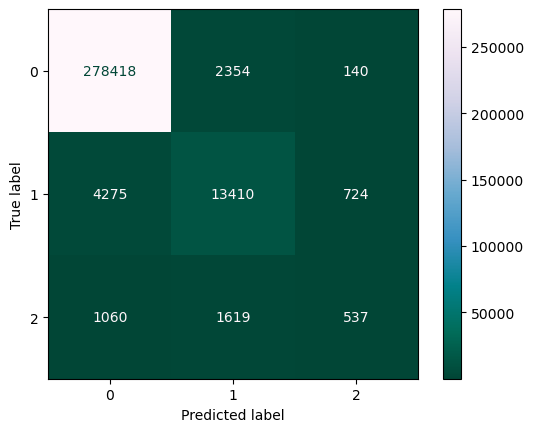

In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = Y_test['Label']

cm = confusion_matrix(y_true, y_pred)
print(classification_report(y_true, y_pred))

disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap = 'PuBuGn_r')